# Variáveis

## Escalas de mensuração

As variáveis ainda podem ser classificadas de acordo com o nível ou escala de mensuração. **Mensuração** é o processo de atribuir números ou rótulos a objetos, pessoas, estados ou eventos de acordo com regras específicas para representar quantidades ou qualidades dos atributos.

*Regra* é um guia, método ou comando que indica ao investigador como medir o atributo.

*Escala* é um conjunto de símbolos ou números, construído com base em uma regra, e aplica-se a indivíduos ou a seus comportamentos ou atitudes. A posição de um indivíduo na escala é baseada na posse dele do atributo que a escala deve medir.

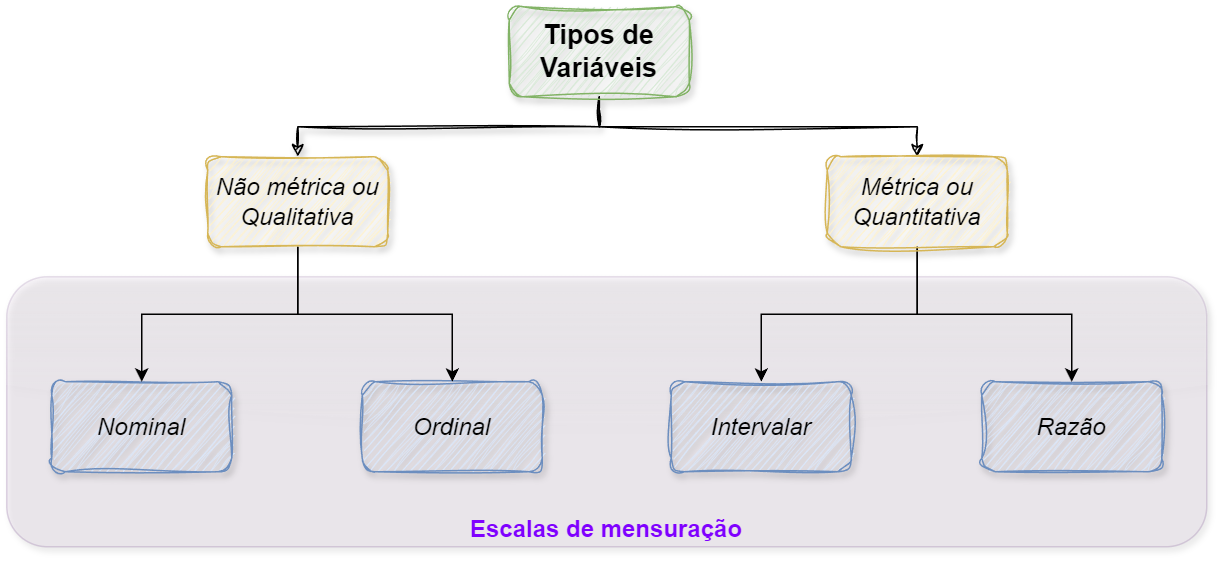

### Variáveis não métricas - escala nominal

A escala nominal classifica as unidades em classes ou categorias em relação à característica representada, não estabelecendo qualquer relação de grandeza ou ordem.

Exemplos: sexo, cor dos olhos, estado civil, religião, localização geográfica, etc.

Considere a tabela a seguir com 10 grandes multinacionais e seus respectivos países de origem:

Empresa | País de origem
--- | ---
Exxon Mobil | 1
JP Morgan Chase | 1
General Electric | 1
Royal Dutch Shell | 2
ICBC | 3
HSBC Holdings | 4
PetroChina | 3
Berkshire Hathaway | 1
Wells Fargo | 1
Petrobras | 5

Observe que os países de origem das empresas são representados por números inteiros. Neste caso, os números são apenas rótulos para as categorias de países de origem (Estados Unidos, 1; Holanda, 2; China, 3; Reino Unido, 4; Brasil, 5). Não faz sentido somar, subtrair, multiplicar ou dividir os números que representam os países de origem das empresas. Portanto, a escala de mensuração é nominal.

In [1]:
import pandas as pd

# passando a tabela exemplo para um dicionário
empresas = {
    "Exxon Mobil": 1,
    "JP Morgan Chase": 1,
    "General Electric": 1,
    "Royal Dutch Shell": 2,
    "ICBC": 3,
    "HSBC Holdings": 4,
    "PetroChina": 3,
    "Berkshire Hathaway": 1,
    "Wells Fargo": 1,
    "Petrobras": 5,
}

# dicionário com os países
paises = {
    1: "Estados Unidos",
    2: "Holanda",
    3: "China",
    4: "Reino Unido",
    5: "Brasil",
}



In [ ]:
#visualizando os dados 
empresas.items()

dict_items([('Exxon Mobil', 1), ('JP Morgan Chase', 1), ('General Electric', 1), ('Royal Dutch Shell', 2), ('ICBC', 3), ('HSBC Holdings', 4), ('PetroChina', 3), ('Berkshire Hathaway', 1), ('Wells Fargo', 1), ('Petrobras', 5)])

 convertendo um dicionário em um DataFrame do Pandas 

In [ ]:
#tranforma o dicionario empresas em uma lista de tuplas com o método .items()
#a chave do dicionario é "empresa"
#o valor da chave é codigo_pais
df_empresas = pd.DataFrame(empresas.items(), columns=["empresa", "codigo_pais"])
df_empresas

,empresa,codigo_pais
0,Exxon Mobil,1
1,JP Morgan Chase,1
2,General Electric,1
3,Royal Dutch Shell,2
4,ICBC,3
5,HSBC Holdings,4
6,PetroChina,3
7,Berkshire Hathaway,1
8,Wells Fargo,1
9,Petrobras,5


In [5]:
#inspecionando os dados com .info()
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   empresa      10 non-null     object
 1   codigo_pais  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [ ]:
#O discribe não faz sentido no tipo de situação
df_empresas.describe()

,codigo_pais
count,10.00000
mean,2.20000
std,1.47573
min,1.00000
25%,1.00000
50%,1.50000
75%,3.00000
max,5.00000


In [ ]:
#contando quantas vezes um determinado pais aparece 
df_empresas["codigo_pais"].value_counts()

codigo_pais
1    5
3    2
2    1
4    1
5    1
Name: count, dtype: int64

convertendo a coluna "codigo_pais" do DataFrame df_empresas para o tipo categórico (category), **otimizando memória e** melhorando o **desempenho** em operações com dados repetidos.

In [8]:
#transformando codigo_pais como tipo cateogory
df_empresas["codigo_pais"] =  df_empresas["codigo_pais"].astype("category")
df_empresas

,empresa,codigo_pais
0,Exxon Mobil,1
1,JP Morgan Chase,1
2,General Electric,1
3,Royal Dutch Shell,2
4,ICBC,3
5,HSBC Holdings,4
6,PetroChina,3
7,Berkshire Hathaway,1
8,Wells Fargo,1
9,Petrobras,5


In [ ]:
#checando os tipos de dados - category
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   empresa      10 non-null     object  
 1   codigo_pais  10 non-null     category
dtypes: category(1), object(1)
memory usage: 434.0+ bytes


In [10]:
df_empresas.describe()

,empresa,codigo_pais
count,10,10
unique,10,5
top,Exxon Mobil,1
freq,1,5


In [ ]:
#excluindo tipo numerico
df_empresas.describe(exclude="number")

,empresa,codigo_pais
count,10,10
unique,10,5
top,Exxon Mobil,1
freq,1,5


Retornando os códigos numéricos correspondentes a cada categoria na coluna "codigo_pais". Tornando as operações mais eficientes, economiza memória

In [14]:
df_empresas["codigo_pais"].cat.codes

0    0
1    0
2    0
3    1
4    2
5    3
6    2
7    0
8    0
9    4
dtype: int8

cat.ordered é um atributo do tipo categórico no Pandas que verifica se as categorias tiverem uma ordem definida (como uma classificação) e retorna TRUE, ou False caso contrário.

In [ ]:
#verificando se o tipo category é ordenado
df_empresas["codigo_pais"].cat.ordered

False